In [1]:
import matplotlib.pyplot as p
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import numpy as np
import hyperspy.api as hs
import atomap.api as am
import pathlib as Path
%%matplotlib nbagg

/home/michel/.local/lib/python3.8/site-packages/pyUSID/viz/__init__.py:16: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  warn('Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. '
UsageError: Line magic function `%%matplotlib` not found.


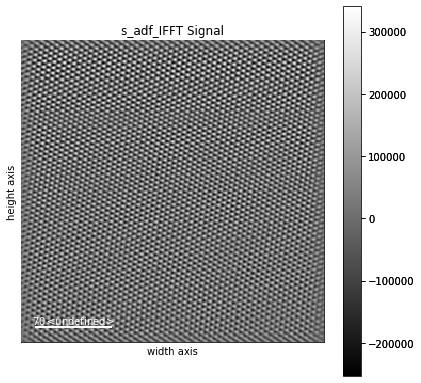

In [3]:
path = "4DSTEM/Datos/s_adf_IFFT.tif"
s = hs.load(path)
s.plot()

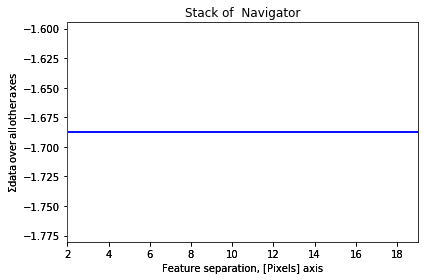

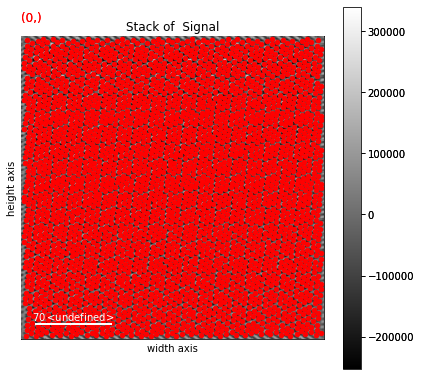

In [3]:
s_peaks = am.get_feature_separation(s, separation_range=(2, 20), show_progressbar=True)
s_peaks.plot()

In [4]:
atom_positions = am.get_atom_positions(s, separation=3)

In [5]:
sublattice = am.Sublattice(atom_positions, image=s.data)
sublattice

<Sublattice,  (atoms:3213,planes:0)>

In [8]:
xPosition = list(sublattice.x_position)
yPosition = list(sublattice.y_position)

N = len(xPosition)
meanDistance = np.zeros(N)
neighbors = np.zeros(6)

for j in range(0,N):
    distance = np.zeros(N)
    for k in range(0,N):
        distance[k] = np.sqrt((xPosition[j] - xPosition[k])**2 + (yPosition[j] - yPosition[k])**2)
    neighbors = sorted(distance)[1:7]
    meanDistance[j] = np.mean(neighbors)

In [9]:
x = xPosition
y = yPosition
z = meanDistance

xlim = max(x)
ylim = max(y)

x1 = []
y1 = []
z1 = []

for i in range(0, N-1):
    if x[i] > (0.1*xlim) and x[i] < (xlim - 0.1*xlim) and y[i] > (0.1*ylim) and y[i] < (ylim - 0.1*ylim):
        x1.append(x[i])
        y1.append(y[i])
        z1.append(z[i])

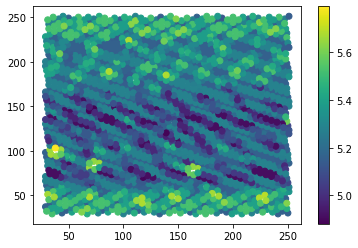

In [10]:
fig, ax = p.subplots()
sc = ax.scatter(x1, y1, c=z1)
cbar = fig.colorbar(sc)
p.show()

In [11]:
sublattice.find_nearest_neighbors()
sublattice.refine_atom_positions_using_center_of_mass()
sublattice.refine_atom_positions_using_2d_gaussian()

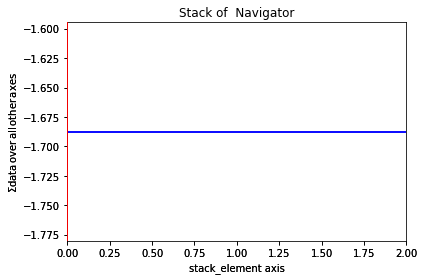

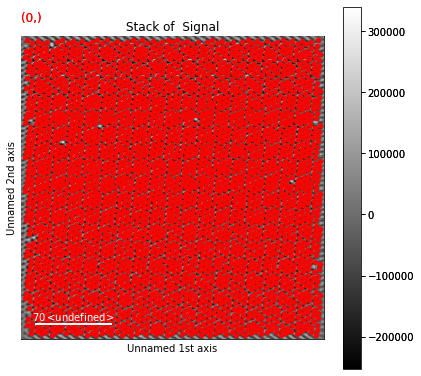

In [12]:
sublattice.get_position_history().plot()

In [13]:
xPosition = list(sublattice.x_position)
yPosition = list(sublattice.y_position)

N = len(xPosition)
meanDistance = np.zeros(N)
neighbors = np.zeros(6)

for j in range(0,N):
    distance = np.zeros(N)
    for k in range(0,N):
        distance[k] = np.sqrt((xPosition[j] - xPosition[k])**2 + (yPosition[j] - yPosition[k])**2)
    neighbors = sorted(distance)[1:7]
    meanDistance[j] = np.mean(neighbors)

In [14]:
x = xPosition
y = yPosition
z = meanDistance

xlim = max(x)
ylim = max(y)

x1 = []
y1 = []
z1 = []

for i in range(0, N-1):
    if x[i] > (0.1*xlim) and x[i] < (xlim - 0.1*xlim) and y[i] > (0.1*ylim) and y[i] < (ylim - 0.1*ylim):
        x1.append(x[i])
        y1.append(y[i])
        z1.append(z[i])

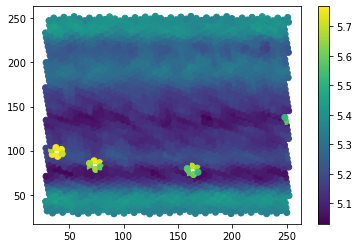

In [15]:
fig, ax = p.subplots()
sc = ax.scatter(x1, y1, c=z1)
cbar = fig.colorbar(sc)
p.show()

In [38]:
x2 = []
y2 = []
z2 = []

for i in range(0, N-1):
    if x[i] > (0.1*xlim) and x[i] < (xlim - 0.1*xlim) and y[i] > (0.1*ylim) and y[i] < (ylim - 0.1*ylim) and z[i] < 1.025*np.mean(z):
        x2.append(x[i])
        y2.append(y[i])
        z2.append(z[i])

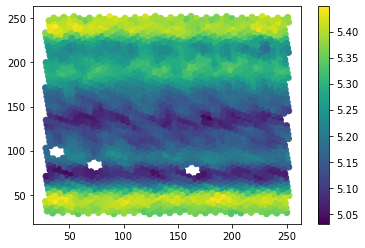

In [39]:
fig, ax = p.subplots()
sc = ax.scatter(x2, y2, c=z2)
cbar = fig.colorbar(sc)
p.show()